# Radial Base Function Network (RBF) and Universal Approximation Theorem

Implementation of a Radial Base Function Network (RBF) and the Universal Approximation Theorem.  The RBF network is trained using the data contained in a csv file

In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Universal Approximation Theorem 

### Radial base functions 

In [2]:
def multicuadratic(c):
    def f(x):
        return np.sqrt(1 + c**2 * x**2)
    
    return f

def multiquadratic_inverse(c):
    def f(x):
        return 1 / np.sqrt(1 + c**2 * x**2)
    
    return f

def gaussian(c):
    def f(x):
        return np.exp(- x**2 / (2 * c**2))
    
    return f

### Load data

In [3]:
def load_data(file: str):
    data = pd.read_csv(file, header=None)
    X = data.iloc[:, 0].values
    y = data.iloc[:, 1].values
    return X, y


### Universal Approximation

In [4]:
def universal_aproximator(X, y, phi, lambda_ = 0):
    """
    X: input data
    y: output data
    phi: basis function
    -----
    returns:
    w: weights of the basis functions
    """
    
    # number of data points
    N = len(X)
    # matrix of basis functions
    PHI = np.zeros((N, N))
    # regularization matrix
    LAMBDA = np.eye(N) * lambda_
    
    # First stage: calculate the interpolation matrix
    for i in range(N):
        for j in range(N):
            PHI[i, j] = phi(np.abs(X[i] - X[j]))
    
    # add regularization
    PHI += LAMBDA

    # Second stage: calculate the weights
    w = np.linalg.inv(PHI) @ y
    
    return w

def F(X, w, phi):
    """
    X: input data
    w: weights of the basis functions
    phi: basis function
    -----
    returns:
    y: output data
    """
    
    # number of data points
    N = len(X)
    # matrix of basis functions
    PHI = np.zeros((N, N))
    
    # First stage: calculate the interpolation matrix
    for i in range(N):
        for j in range(N):
            PHI[i, j] = phi(np.abs(X[i] - X[j]))
    
    # Second stage: calculate the weights
    y = PHI @ w
    
    return y

### Test the network

The test data is contained in the file `data/Spectra100.csv`.  The first column is the input and the second column is the output.  The network is trained using the no iterative method, divide in two stages

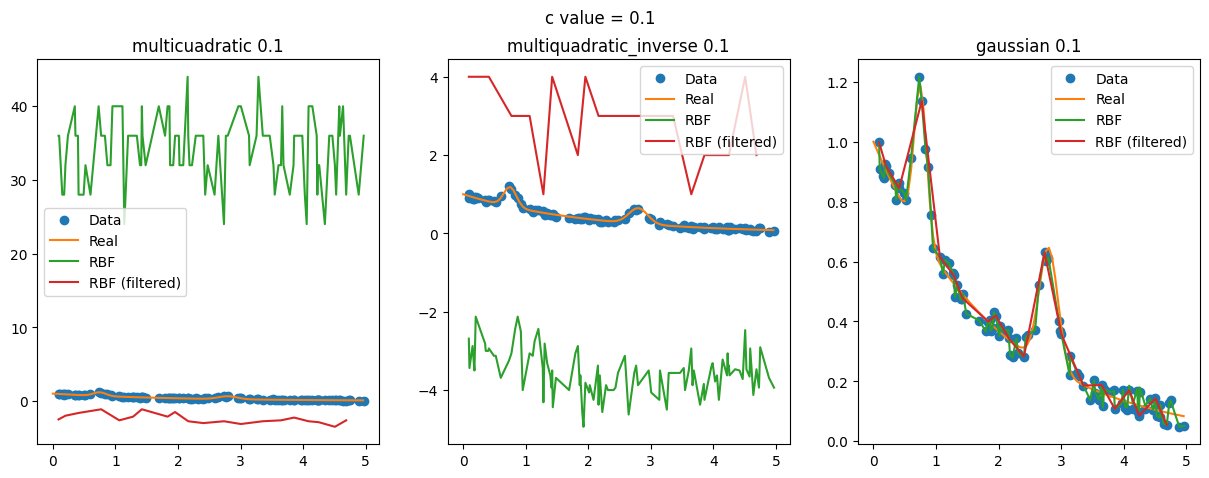

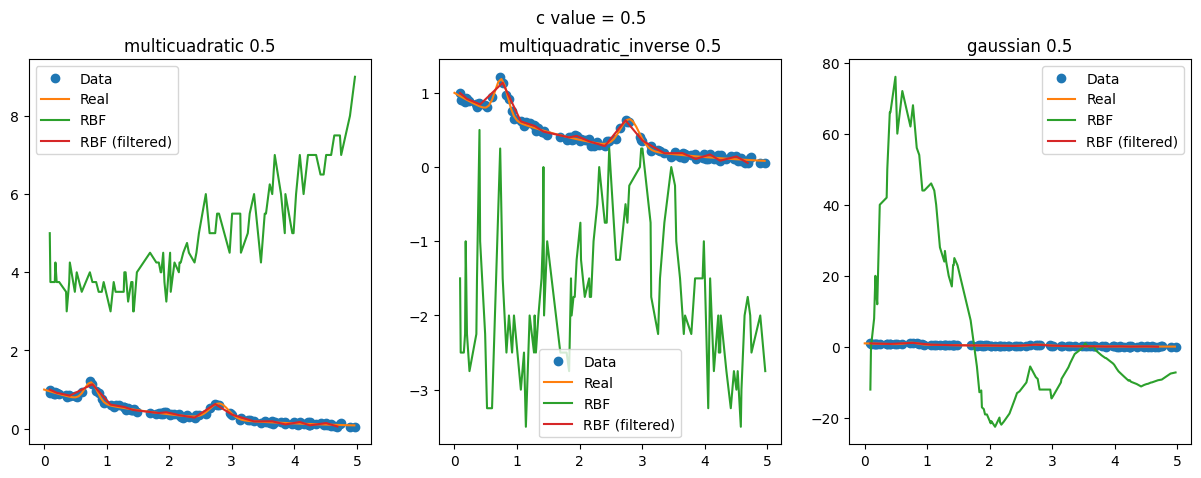

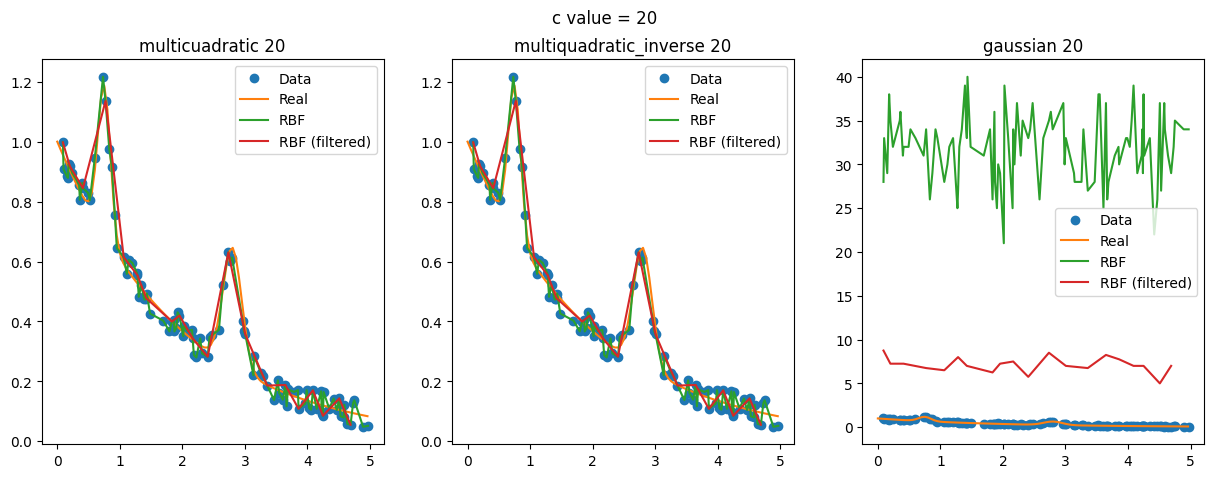

In [5]:
# load the data
X, y = load_data('data/Spectra100.csv')
# filter the data to get 1 of every 5 points
X_filter = X[::5]
y_filter = y[::5]
# Set different c values
# c = [0.0001, 0.001, 0.01, 0.1, 0.5, 20, 50, 100]
c = [0.1, 0.5, 20] # more representative values
# Set the basis functions
phi_values = [[(multicuadratic(c_i), f"multicuadratic {c_i}"), 
               (multiquadratic_inverse(c_i), f"multiquadratic_inverse {c_i}"), 
               (gaussian(c_i), f"gaussian {c_i}")] for c_i in c]
# calculate the weights for each basis function
w = [[(universal_aproximator(X, y, phi_i[0]), 
       phi_i[1], phi_i[0], 
       universal_aproximator(X_filter, y_filter, phi_i[0])) for phi_i in phi_values_i] for phi_values_i in phi_values]
# load the real data
X_real, y_real = load_data('data/SpectraReal.csv')

# if want to visualize the results in a separate window uncomment the following line 
# %matplotlib qt
# if want to visualize the results in the notebook uncomment the following line
# %matplotlib inline
for w_i in w:
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for j, w_j in enumerate(w_i):
      axs[j].plot(X, y, 'o', label='Data')
      axs[j].plot(X_real, y_real, label='Real')
      axs[j].plot(X, F(X, w_j[0], w_j[2]), label='RBF')
      axs[j].plot(X_filter, F(X_filter, w_j[3], w_j[2]), label='RBF (filtered)')
      # axs[j].set_xlim(-0.2, 5.2)
      # axs[j].set_ylim(-0.05, 1.3)
      axs[j].set_title(w_j[1])
      axs[j].legend()

    plt.suptitle("c value = " + w_i[0][1].split(" ")[1])
    plt.show()



### Test the network with Universal aproximator with regularization

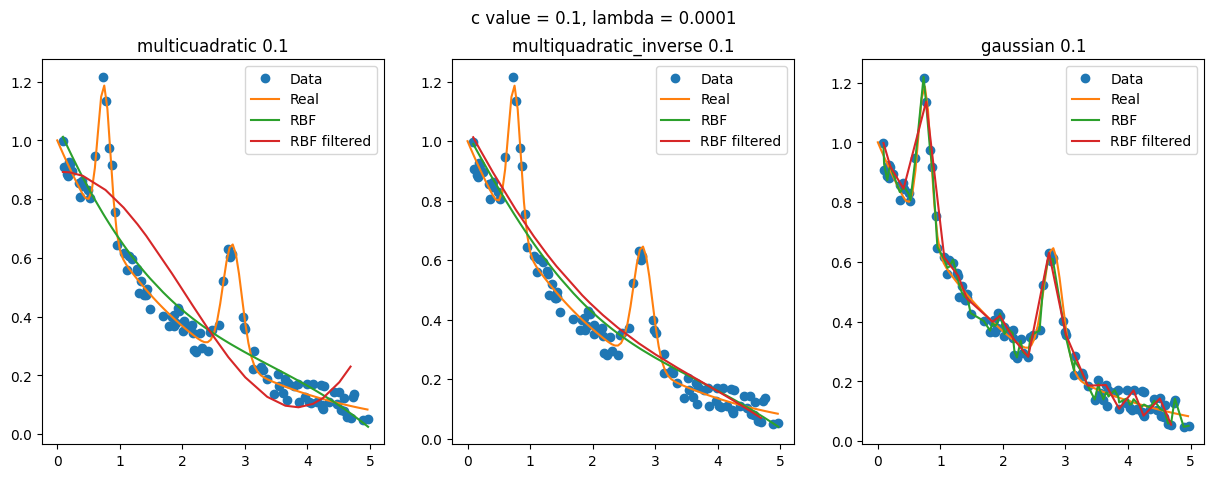

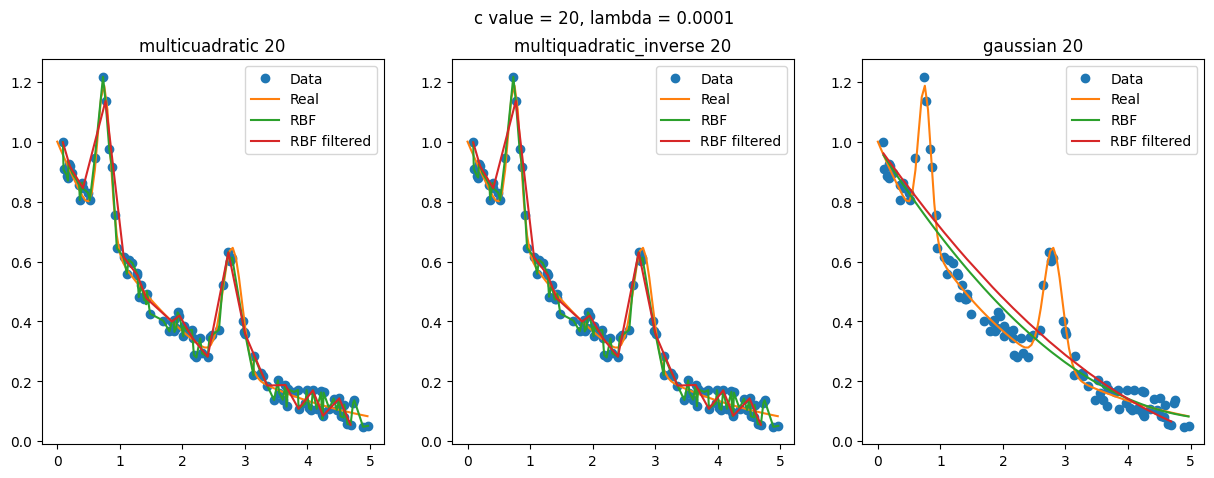

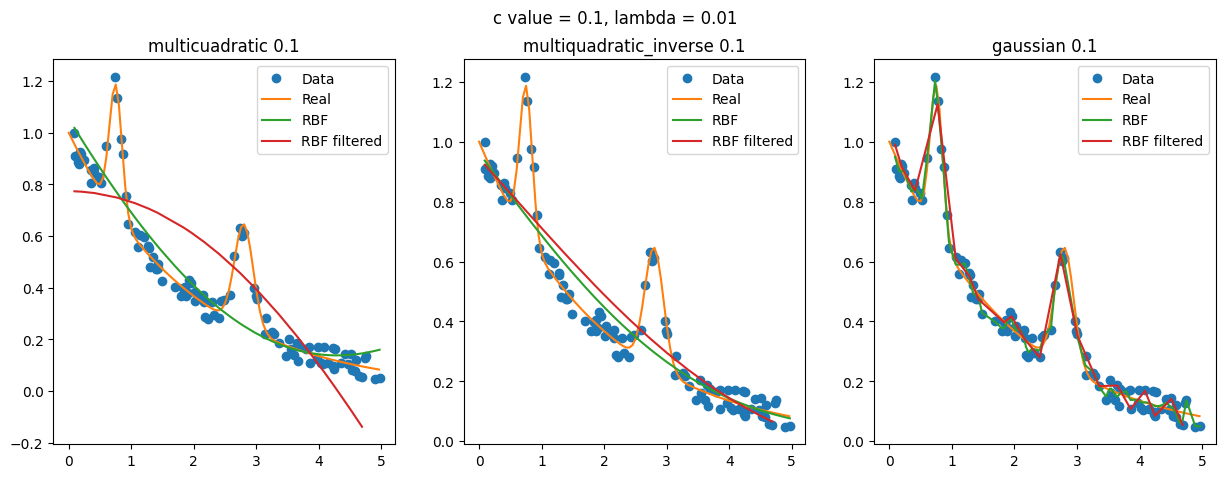

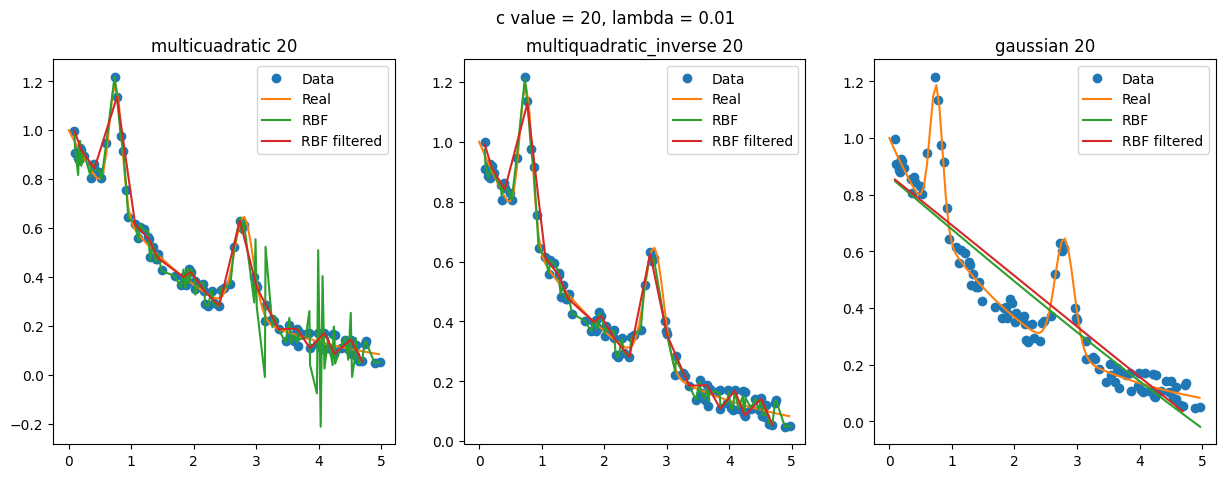

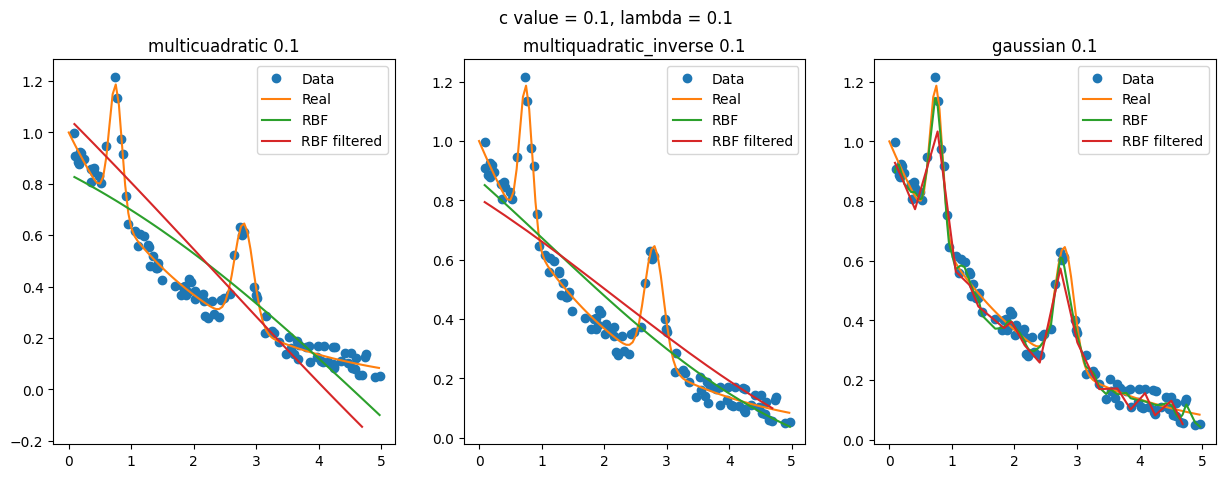

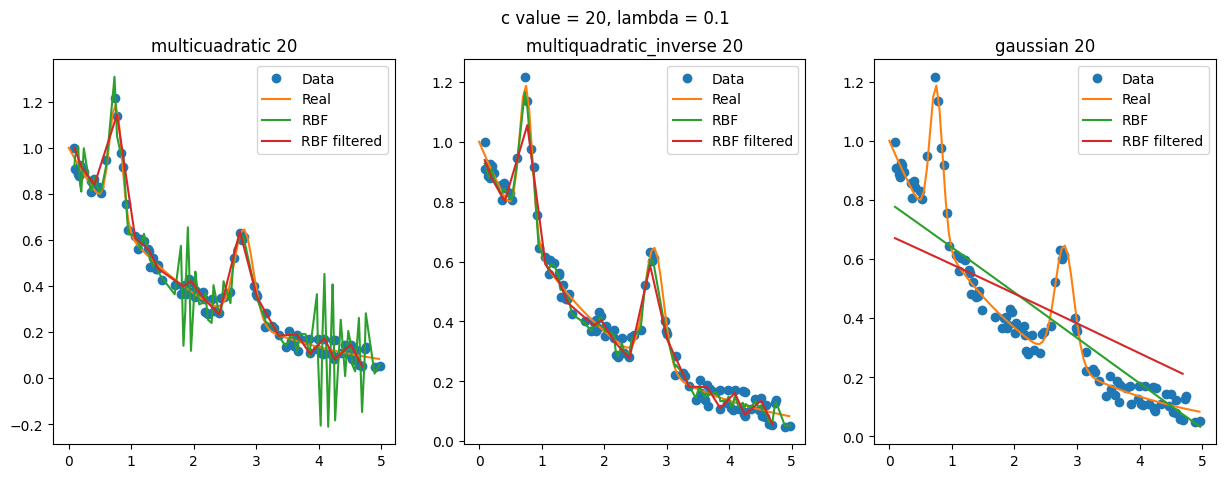

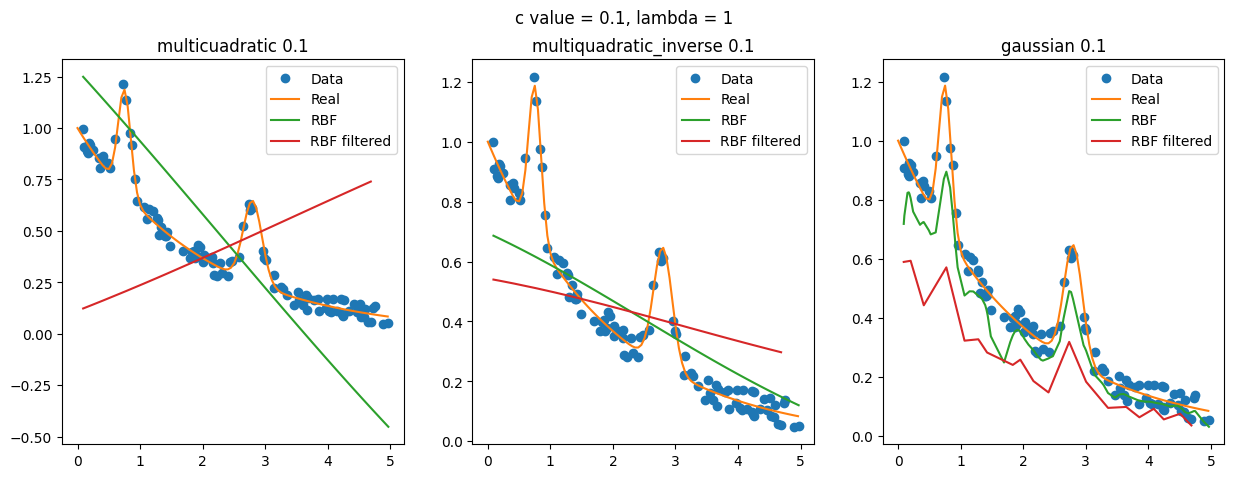

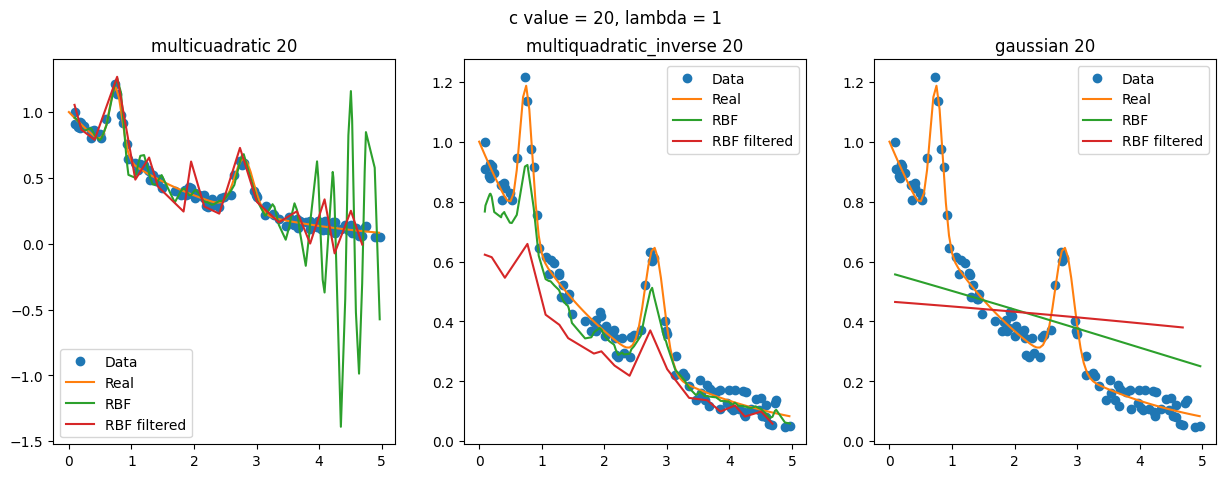

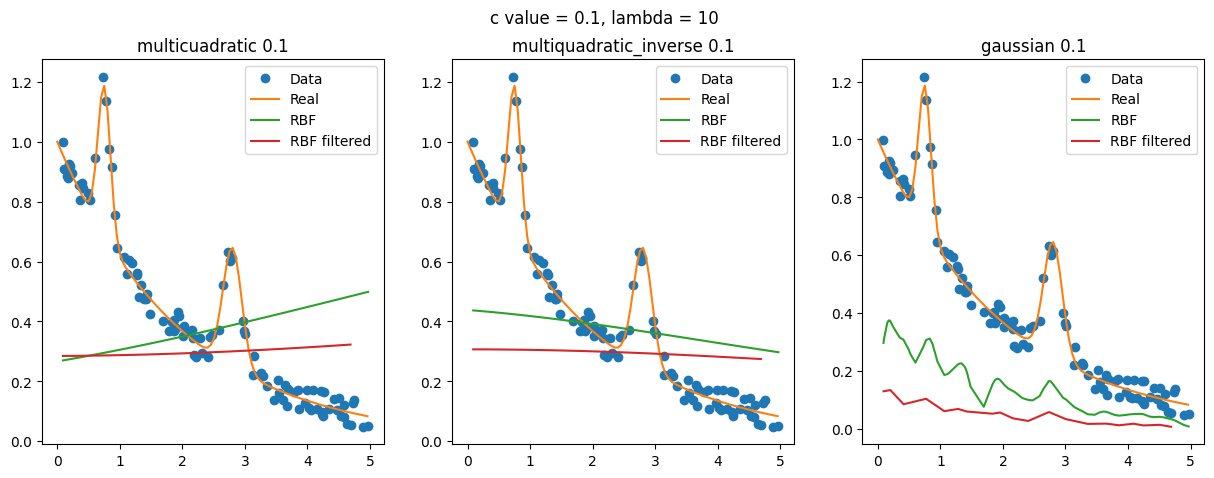

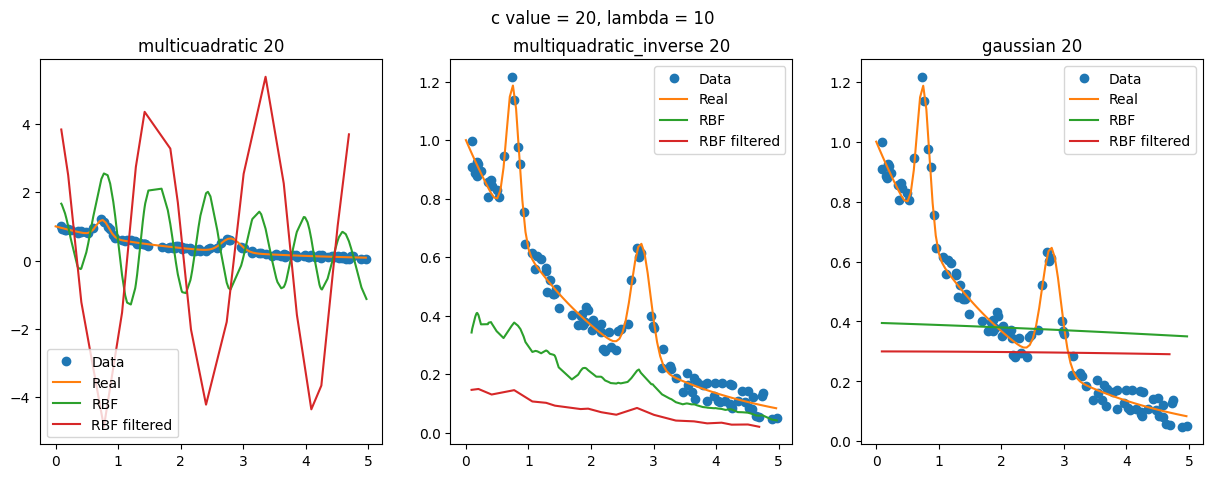

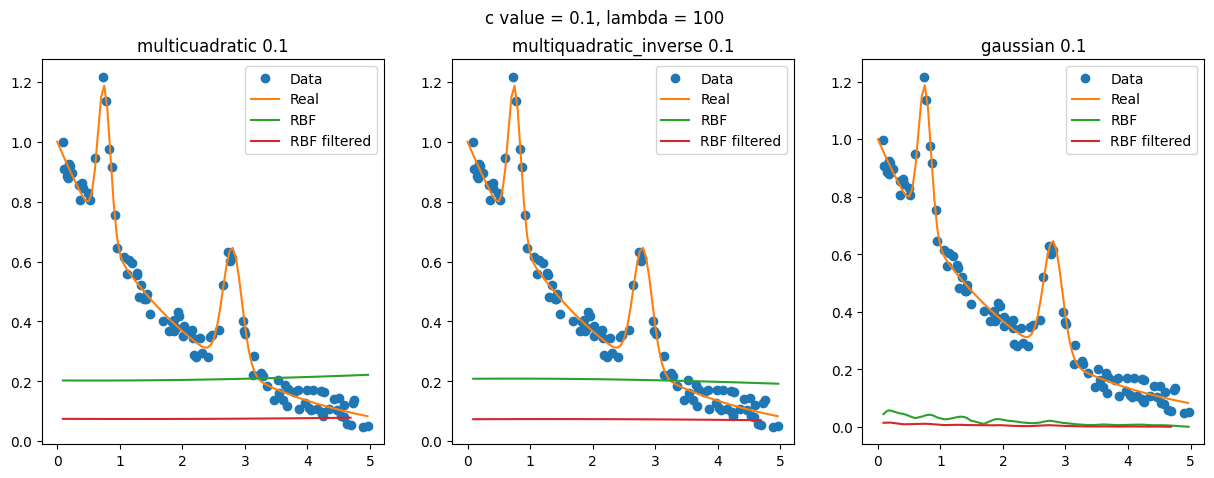

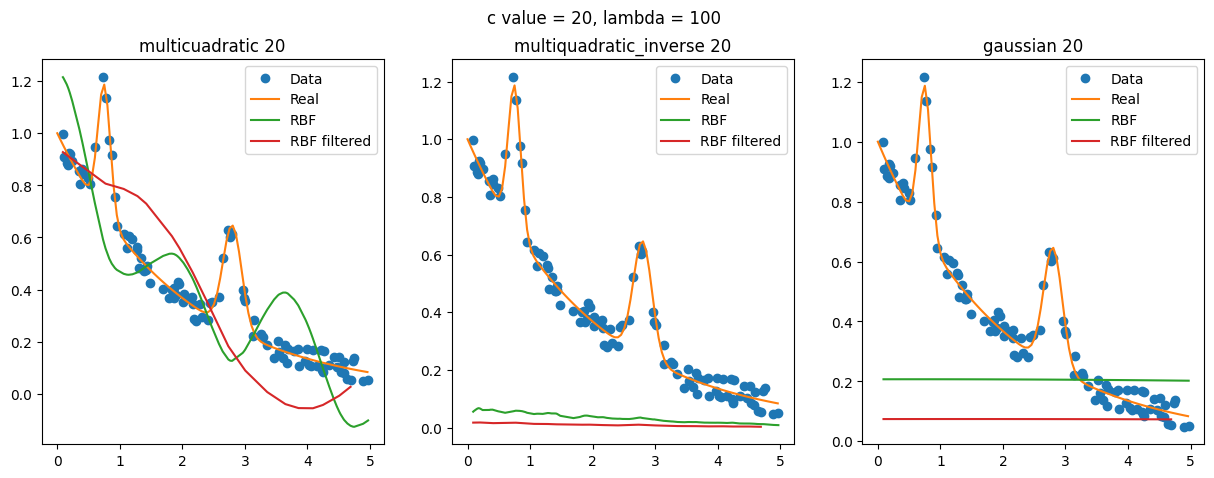

In [6]:
# load the data
X, y = load_data('data/Spectra100.csv')
# filter the data to get 1 of every 5 points
X_filtered = X[::5]
y_filtered = y[::5]

# Set different c values
c = [0.1, 20]
# Set the regularization parameter
lambda_ = [0.0001, 0.01, 0.1, 1, 10, 100]

# Set the basis functions
phi_values = [[(multicuadratic(c_i), f"multicuadratic {c_i}"), 
               (multiquadratic_inverse(c_i), f"multiquadratic_inverse {c_i}"), 
               (gaussian(c_i), f"gaussian {c_i}")] for c_i in c]
w_lambda = []

for lambda_i in lambda_:
    # calculate the weights for each basis function
    w = [[(universal_aproximator(X, y, phi_i[0], lambda_i), 
           phi_i[1], phi_i[0], 
           universal_aproximator(X_filtered, y_filtered, phi_i[0], lambda_i)) for phi_i in phi_values_i] for phi_values_i in phi_values]
    w_lambda.append((w, lambda_i))
# load the real data
X_real, y_real = load_data('data/SpectraReal.csv')

# if want to visualize the results in a separate window uncomment the following line
# %matplotlib qt
# %matplotlib inline
for w, lambda_i in w_lambda:
    for w_i in w:
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        for j, w_j in enumerate(w_i):
          axs[j].plot(X, y, 'o', label='Data')
          axs[j].plot(X_real, y_real, label='Real')
          axs[j].plot(X, F(X, w_j[0], w_j[2]), label='RBF')
          axs[j].plot(X_filtered, F(X_filtered, w_j[3], w_j[2]), label='RBF filtered')
          axs[j].set_title(w_j[1])
          axs[j].legend()
          
        plt.suptitle("c value = " + w_i[0][1].split(" ")[1] + ", lambda = " + str(lambda_i))
        # plt.legend()
        plt.show()

In [8]:
# auxiliar functions
def max_diff(array: np.ndarray) -> float:
    """Calculate the maximum difference between every two elements in an array"""
    max_diff = -1
    for i in range(len(array)):
        for j in range(i + 1, len(array)):
            max_diff = max(max_diff, abs(array[i] - array[j]))

    return max_diff 

### Generalice Radial Base Function (GRBF) Network from scratch using k-means method to find the centers

In [30]:
from sklearn.cluster import KMeans

def GRBF(x, d, number_of_centers: int, sigma = 0.1, lambda_ = 0):
    """
    Generalized radial basis function interpolation, using k-means to select the centers.
    -------
    :param x: input data
    :param d: output data
    :param number_of_centers: number of centers
    :param sigma: dispersion of the basis functions
    :param lambda_: regularization parameter
    -------
    :return: result
    """
    # get the centers using k-means
    kmeans = KMeans(n_clusters=number_of_centers, random_state=0, n_init='auto'
                    ).fit(x.reshape(-1, 1))
    centers = kmeans.cluster_centers_
    M = centers.shape[0]
    N = x.shape[0]

    # define phi(x,tj)
    def phi(x, t_j):
        return np.exp(-(1/2*sigma ** 2) * np.linalg.norm(x - t_j) ** 2)
    
    # fill the matrix phi
    phi_matrix = np.zeros((N, M))
    # fill the matrix phi with the values of phi(x,tj)
    for i in range(N):
        for j in range(M):
            phi_matrix[i][j] = phi(x[i], centers[j])

    if lambda_ != 0:
        # fill the regularization matrix with the values of lambda * phi(ti, tj)
        regularization_matrix = np.zeros((M, M))
        for i in range(M):
            for j in range(M):
                regularization_matrix[i][j] = lambda_ * phi(centers[i], centers[j])
            
    # add a column of ones to the matrix phi to calculate the bias
    # phi_matrix = np.concatenate((phi_matrix, np.ones((N, 1))), axis=1)

    # calculate the weights using the pseudo-inverse
    if lambda_ == 0:
        w = np.linalg.inv(phi_matrix.T @ phi_matrix) @ phi_matrix.T @ d
    else:
        w = np.linalg.inv(phi_matrix.T @ phi_matrix + regularization_matrix) @ phi_matrix.T @ d

    # calculate the result
    result = phi_matrix @ w

    return w, result

### Test the GRBF Network without regularization

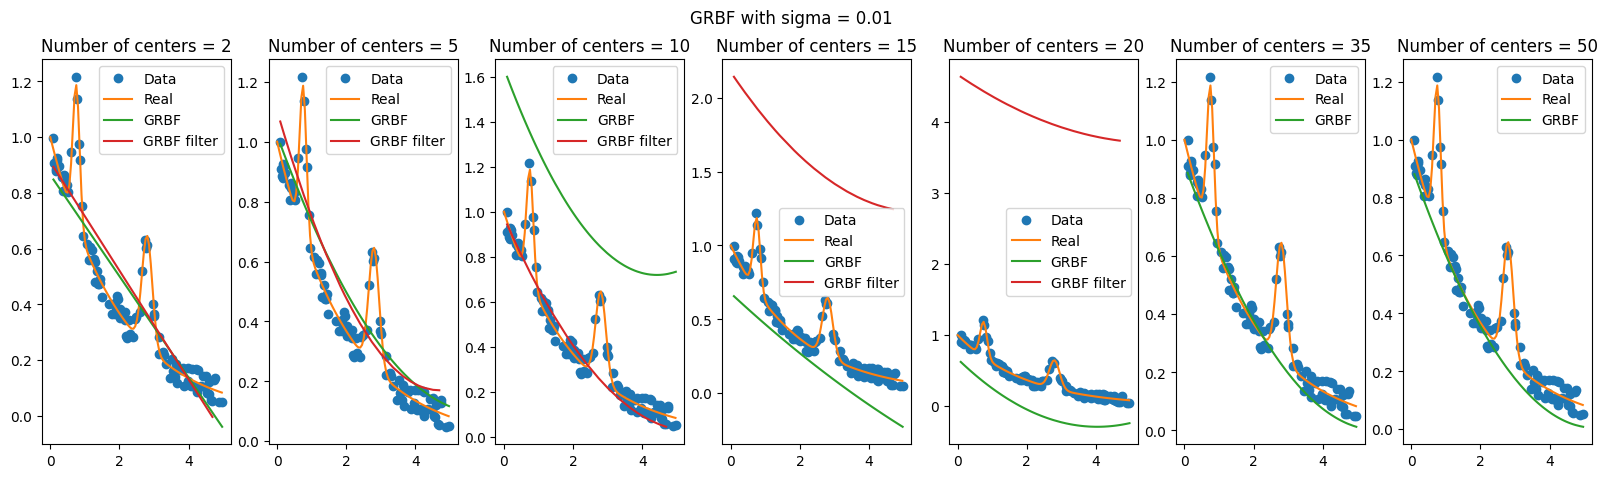

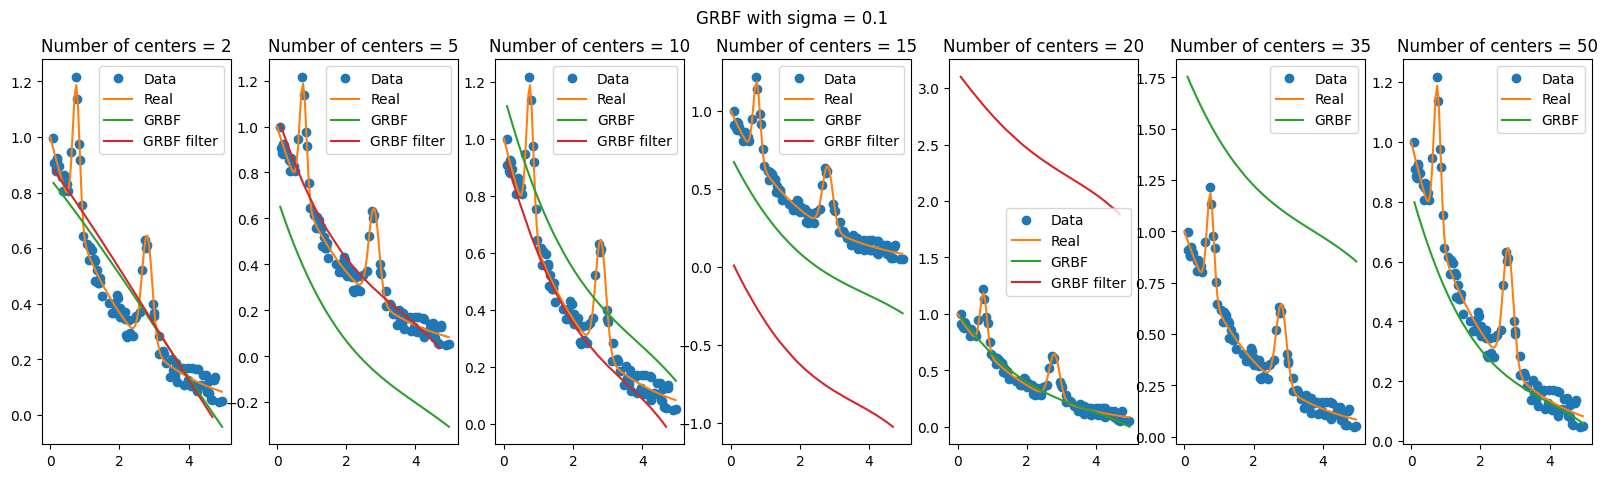

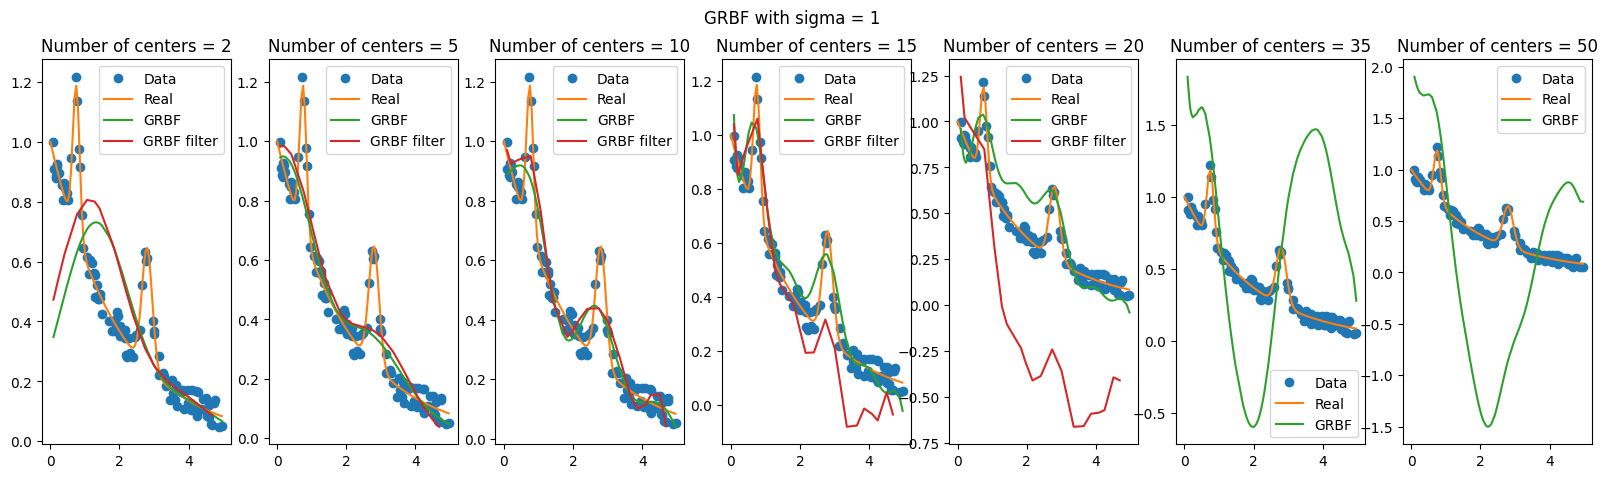

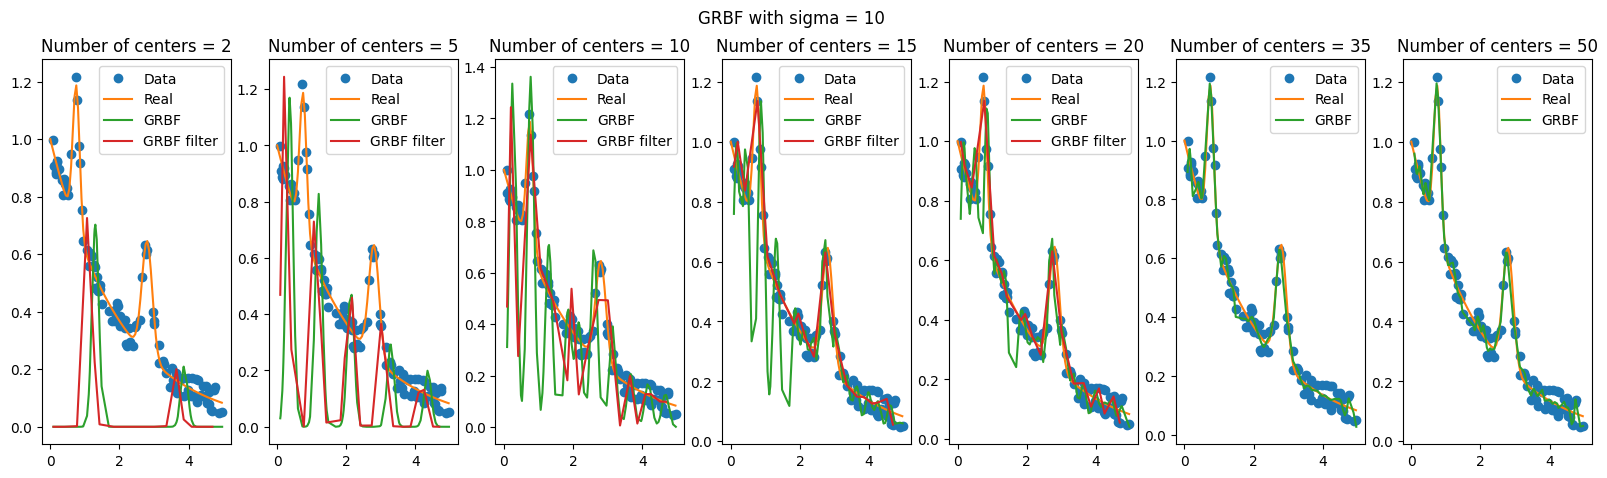

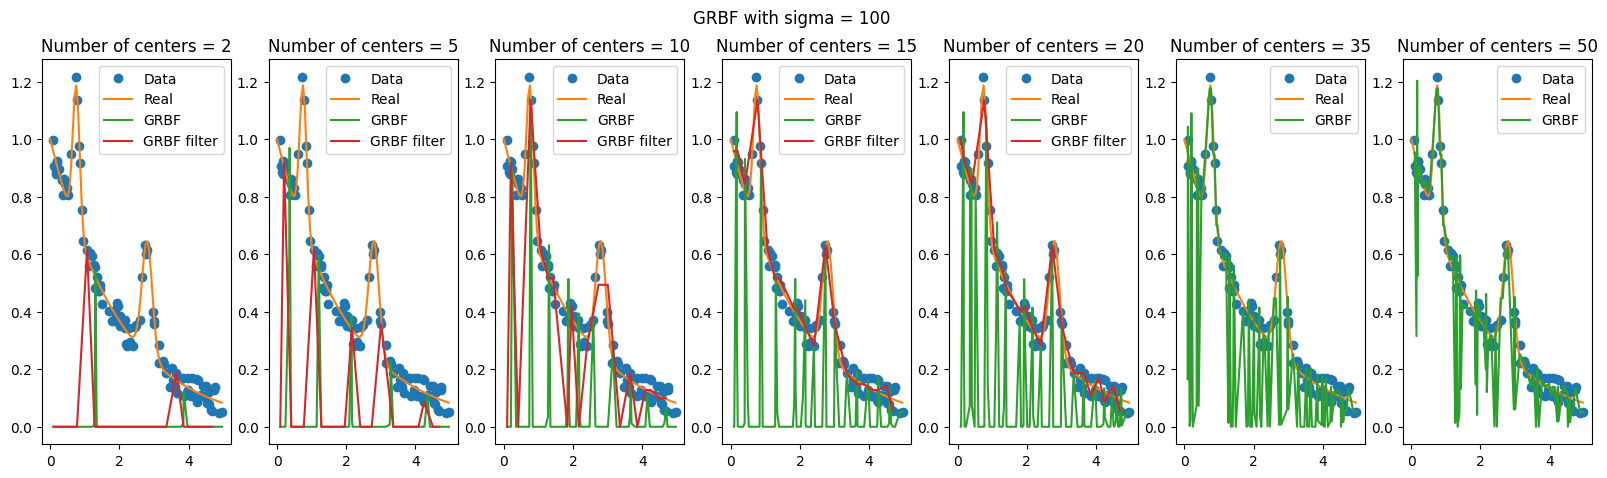

In [18]:
# load the data
X, y = load_data('data/Spectra100.csv')
# filter the data to get 1 of every 5 points
X_filter = X[::5]
y_filter = y[::5]

# set different number of centers
number_of_centers = [2, 5, 10, 15, 20, 35, 50]
# set different sigma values
sigma = [0.01, 0.1, 1, 10, 100]

# calculate the weights for the different number of centers
w = [[(GRBF(X, y, n, s)[1], GRBF(X_filter, y_filter, n, s)[1] if n <= 20 else (-1,-1), n, s) for n in number_of_centers] for s in sigma]

# load the real data
X_real, y_real = load_data('data/SpectraReal.csv')

# if you want to show the plots in the notebook uncomment the next line
# %matplotlib inline
# if you want to show the plots in a separate window uncomment the next line
# %matplotlib qt

# show the results
for i in range(len(sigma)):
    fig, axs = plt.subplots(1, len(number_of_centers), figsize=(20, 5))
    fig.suptitle("GRBF with sigma = " + str(sigma[i]))
    for j in range(len(number_of_centers)):
        axs[j].plot(X, y, 'o', label='Data')
        axs[j].plot(X_real, y_real, label='Real')
        axs[j].plot(X, w[i][j][0], label='GRBF')
        if w[i][j][2] <= 20:
            axs[j].plot(X_filter, w[i][j][1], label='GRBF filter')
        axs[j].legend()
        axs[j].set_title("Number of centers = " + str(number_of_centers[j]))

    plt.show()

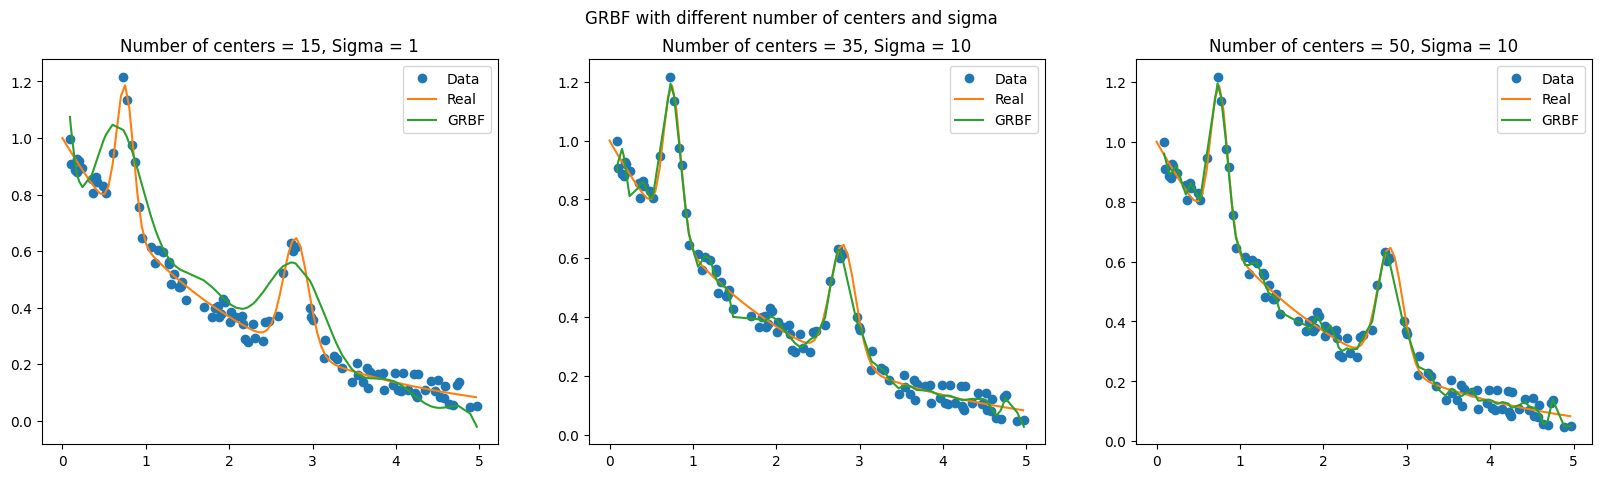

In [19]:
# better parameters
# number of center = 15 and sigma = 1
# number of center = 35, 50 and sigma = 10

w = [
    GRBF(X, y, 15, 1)[1],
    GRBF(X, y, 35, 10)[1],
    GRBF(X, y, 50, 10)[1]
    ]

number_of_centers = [15, 35, 50]
sigma = [1, 10, 10]

# show the results
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("GRBF with different number of centers and sigma")
for i in range(3):
    axs[i].plot(X, y, 'o', label='Data')
    axs[i].plot(X_real, y_real, label='Real')
    axs[i].plot(X, w[i], label='GRBF')
    axs[i].legend()
    axs[i].set_title("Number of centers = " + str(number_of_centers[i]) + ", Sigma = " + str(sigma[i]))



### Test the GRBF Network with regularization

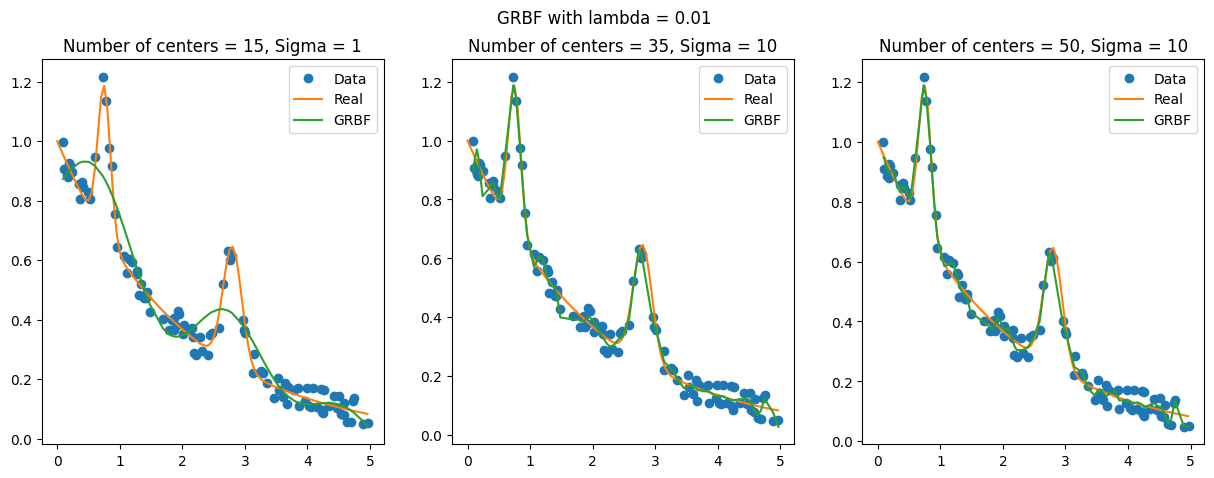

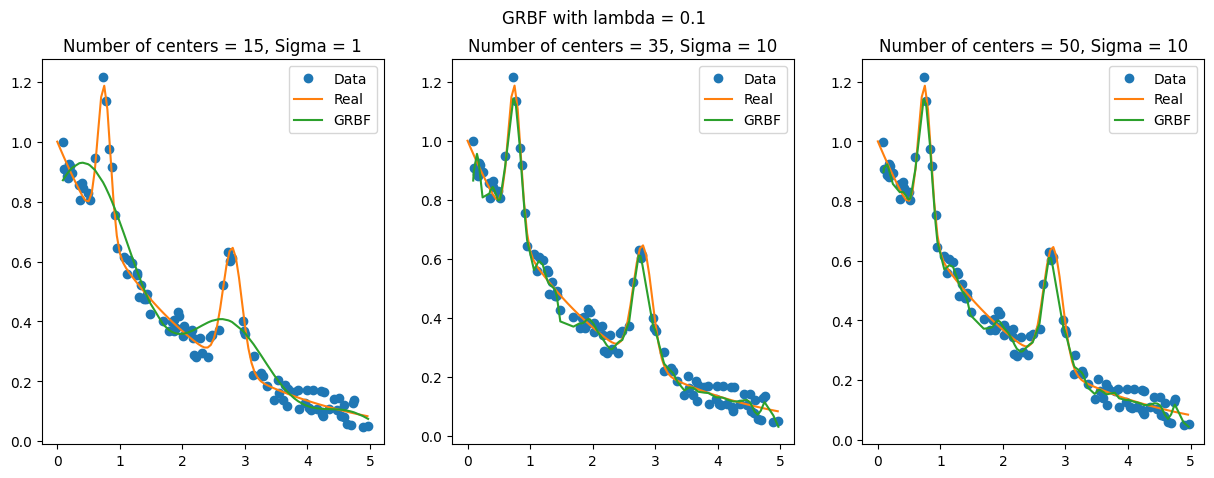

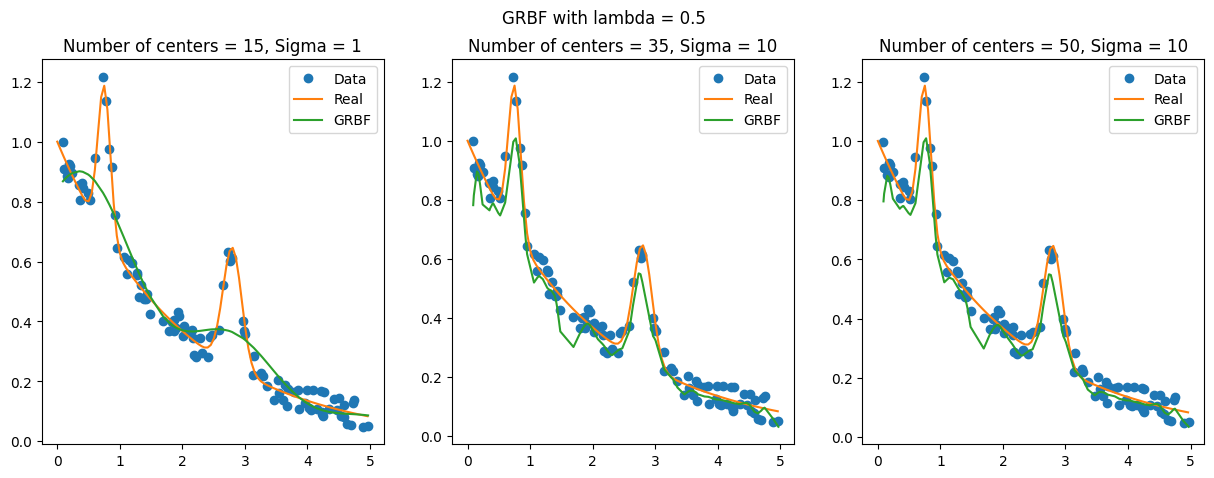

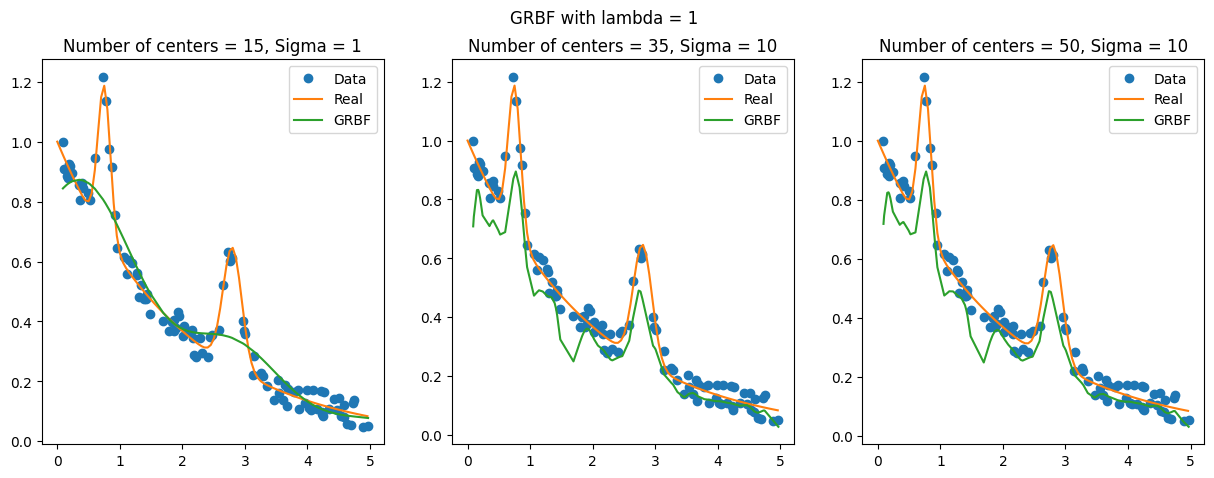

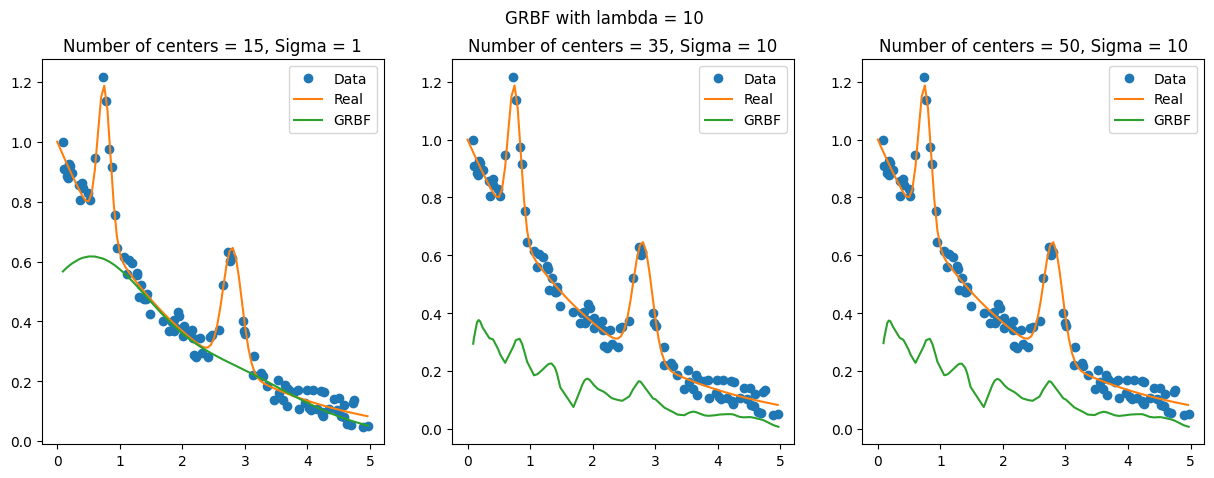

In [31]:
# we take the best parameters of the previous section and test them with different lambda values

# set different lambda values
lambda_ = [0.01, 0.1, 0.5, 1, 10]

# set the function to calculate the weights
def GRBF_lambda1(lambda_ = 0):
    return GRBF(X, y, 15, 1, lambda_)[1]

def GRBF_lambda2(lambda_ = 0):
    return GRBF(X, y, 35, 10, lambda_)[1]

def GRBF_lambda3(lambda_ = 0):
    return GRBF(X, y, 50, 10, lambda_)[1]

# calculate the weights for the different lambda values
w = [
    [GRBF_lambda1(l) for l in lambda_],
    [GRBF_lambda2(l) for l in lambda_],
    [GRBF_lambda3(l) for l in lambda_]
    ]

number_of_centers = [15, 35, 50]
sigma = [1, 10, 10]

# show the results
for i in range(len(lambda_)):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle("GRBF with lambda = " + str(lambda_[i]))
    for j in range(3):
        axs[j].plot(X, y, 'o', label='Data')
        axs[j].plot(X_real, y_real, label='Real')
        axs[j].plot(X, w[j][i], label='GRBF')
        axs[j].legend()
        axs[j].set_title("Number of centers = " + str(number_of_centers[j]) + ", Sigma = " + str(sigma[j]))

    plt.show()